In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



# www.kaggle.com/datasets/imaryanpandey/top-movies-raw-data-csv



/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Raw Data).csv
/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Cleaned Data).csv
/kaggle/input/top-movies-raw-data-csv/Top Movies (Raw Data).csv


In [70]:
import os
import pandas as pd

# Initialize data_path
data_path = None  

# Check environment and assign dataset path
if os.path.exists("/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Raw Data).csv"):
    data_path = "/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Raw Data).csv"
    print("✅ Running on Kaggle.")
elif os.path.exists("Top Movies (Raw Data).csv"):
    data_path = "Top Movies (Raw Data).csv"
    print("✅ Running locally.")
else:
    raise FileNotFoundError("❌ Dataset not found in Kaggle or local paths.")

# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows
df.head()


✅ Running on Kaggle.


,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,Movie URL,Domestic Box Office,International Box Office,Worldwide Box Office,...,Franchise:,Comparisons:,Keywords:,Source:,Genre:,Production Method:,Creative Type:,Production/Financing Companies:,Production Countries:,Languages:
0,1,16-Dec-15,Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835",https://www.the-numbers.com/movie/Star-Wars-Ep...,"$936,662,225","$1,119,384,610","$2,056,046,835",...,Star Wars,"All-Time Top-Grossing FilmsBlockbusters, 2015v...","Space Opera,Good vs. Evil,Delayed Sequel,Inter...",Original Screenplay,Adventure,Animation/Live Action,Science Fiction,"Lucasfilm,Bad Robot",United States,English
1,2,9-Dec-22,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775",https://www.the-numbers.com/movie/Avatar-The-W...,"$684,075,767","$1,631,514,008","$2,315,589,775",...,Avatar,All-Time Top-Grossing Filmsvs. AvatarCreate yo...,"Action Adventure,Delayed Sequel,Humans as Alie...",Original Screenplay,Action,Animation/Live Action,Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English
2,3,28-Jun-23,Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057",https://www.the-numbers.com/movie/Indiana-Jone...,"$174,480,468","$209,482,589","$383,963,057",...,Indiana Jones,vs. Mission: Impossible Dead Reckoning Part On...,"1960s,Space Program,Nazis Outside of World War...",Original Screenplay,Adventure,Live Action,Historical Fiction,"Lucasfilm,Walt Disney Pictures,Paramount Pictures",United States,English
3,4,23-Apr-19,Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",https://www.the-numbers.com/movie/Avengers-End...,"$858,373,000","$1,889,869,781","$2,748,242,781",...,Marvel Cinematic UniverseAvengers,All-Time Top-Grossing Filmsvs. Avengers: Infin...,"Ensemble,Marvel Comics,Animal Lead,Non-Chronol...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
4,5,21-May-25,Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0,https://www.the-numbers.com/movie/Mission-Impo...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📌 Phase 1: Data Exploration (EDA)

In [71]:
import pandas as pd

# Load Raw Data
df_raw = pd.read_csv(data_path)

# List column names and their data types
print("\nColumn Names and Data Types:")
print(df_raw.info())



Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       6569 non-null   object
 1   ReleaseDate                      6569 non-null   object
 2   Movie                            6569 non-null   object
 3   ProductionBudget                 6569 non-null   object
 4   DomesticGross                    6569 non-null   object
 5   WorldwideGross                   6569 non-null   object
 6   Movie URL                        6569 non-null   object
 7   Domestic Box Office              5847 non-null   object
 8   International Box Office         5044 non-null   object
 9   Worldwide Box Office             5044 non-null   object
 10  Est. Domestic DVD Sales          2566 non-null   object
 11  Est. Domestic Blu-ray Sales      2156 non-null   object
 12  Tota

In [72]:

# Check dataset shape
print(f"Dataset contains {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")

Dataset contains 6569 rows and 34 columns.


In [73]:

# Display first few rows
print("First 10 Rows of the Dataset:")
display(df_raw.head(10))


First 10 Rows of the Dataset:


,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,Movie URL,Domestic Box Office,International Box Office,Worldwide Box Office,...,Franchise:,Comparisons:,Keywords:,Source:,Genre:,Production Method:,Creative Type:,Production/Financing Companies:,Production Countries:,Languages:
0,1,16-Dec-15,Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835",https://www.the-numbers.com/movie/Star-Wars-Ep...,"$936,662,225","$1,119,384,610","$2,056,046,835",...,Star Wars,"All-Time Top-Grossing FilmsBlockbusters, 2015v...","Space Opera,Good vs. Evil,Delayed Sequel,Inter...",Original Screenplay,Adventure,Animation/Live Action,Science Fiction,"Lucasfilm,Bad Robot",United States,English
1,2,9-Dec-22,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775",https://www.the-numbers.com/movie/Avatar-The-W...,"$684,075,767","$1,631,514,008","$2,315,589,775",...,Avatar,All-Time Top-Grossing Filmsvs. AvatarCreate yo...,"Action Adventure,Delayed Sequel,Humans as Alie...",Original Screenplay,Action,Animation/Live Action,Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English
2,3,28-Jun-23,Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057",https://www.the-numbers.com/movie/Indiana-Jone...,"$174,480,468","$209,482,589","$383,963,057",...,Indiana Jones,vs. Mission: Impossible Dead Reckoning Part On...,"1960s,Space Program,Nazis Outside of World War...",Original Screenplay,Adventure,Live Action,Historical Fiction,"Lucasfilm,Walt Disney Pictures,Paramount Pictures",United States,English
3,4,23-Apr-19,Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",https://www.the-numbers.com/movie/Avengers-End...,"$858,373,000","$1,889,869,781","$2,748,242,781",...,Marvel Cinematic UniverseAvengers,All-Time Top-Grossing Filmsvs. Avengers: Infin...,"Ensemble,Marvel Comics,Animal Lead,Non-Chronol...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
4,5,21-May-25,Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0,https://www.the-numbers.com/movie/Mission-Impo...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",https://www.the-numbers.com/movie/Pirates-of-t...,"$241,071,802","$804,642,000","$1,045,713,802",...,Pirates of the Caribbean,"Blockbusters, 2011vs. Pirates of the Caribbean...","Pirates,Zombies,Visual Effects,Romance,Epilogu...",Based on Theme Park Ride,Adventure,Live Action,Historical Fiction,Walt Disney Pictures,United States,English
6,7,22-Apr-15,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",https://www.the-numbers.com/movie/Avengers-Age...,"$459,005,868","$936,311,111","$1,395,316,979",...,Marvel Cinematic UniverseAvengers,"All-Time Top-Grossing FilmsSummer, 2015Blockbu...","Marvel Comics,Robot,End of the World,Hallucina...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
7,8,17-May-23,Fast X,"$340,000,000","$146,126,015","$714,375,114",https://www.the-numbers.com/movie/Fast-X-(2023...,"$146,126,015","$568,249,099","$714,375,114",...,Fast and the Furious,vs. F9: The Fast SagaCreate your own compariso...,"Car Chase,Gangs,Organized Crime,Sequels With R...",Original Screenplay,Action,Live Action,Contemporary Fiction,"Universal Pictures,Original Film,One Race Film...",United States,English
8,9,23-May-18,Solo: A Star Wars Story,"$330,400,000","$213,767,512","$393,151,347",https://www.the-numbers.com/movie/Solo-A-Star-...,"$213,767,512","$179,383,835","$393,151,347",...,Star Wars,vs. Star Wars Ep. VIII: The Last JediCreate yo...,"Prequel,Space Opera,Smuggler,Heist,Origin Stor...",Spin-Off,Adventure,Animation/Live Action,Science Fiction,Lucasfilm,United States,English
9,10,25-Apr-18,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754",https://www.the-n

In [74]:
# Summary Statistics
print("\nSummary Statistics for Numerical Columns:")
display(df_raw.describe())



Summary Statistics for Numerical Columns:


,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,Movie URL,Domestic Box Office,International Box Office,Worldwide Box Office,...,Franchise:,Comparisons:,Keywords:,Source:,Genre:,Production Method:,Creative Type:,Production/Financing Companies:,Production Countries:,Languages:
count,6569,6569,6569,6569,6569,6569,6569,5847,5044,5044,...,1423,6506,5685,6301,6374,6366,6269,4200,6019,5603
unique,6569,3267,6463,569,5780,6100,6569,5779,4882,5040,...,670,2960,5381,24,15,8,10,3495,362,258
top,1,Unknown,Pinocchio,"$20,000,000",$0,$0,https://www.the-numbers.com/movie/Star-Wars-Ep...,"$8,000,000","$3,000,000","$12,900,000",...,James Bond,Create your own comparison chart…,Romance,Original Screenplay,Drama,Live Action,Contemporary Fiction,Warner Bros.,United States,English
freq,1,114,3,255,722,422,1,9,8,2,...,27,540,52,3429,1712,5826,3274,29,4423,4825


In [75]:
#Categorical Column Statistics
display(df_raw.describe(include = 'all'))

,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,Movie URL,Domestic Box Office,International Box Office,Worldwide Box Office,...,Franchise:,Comparisons:,Keywords:,Source:,Genre:,Production Method:,Creative Type:,Production/Financing Companies:,Production Countries:,Languages:
count,6569,6569,6569,6569,6569,6569,6569,5847,5044,5044,...,1423,6506,5685,6301,6374,6366,6269,4200,6019,5603
unique,6569,3267,6463,569,5780,6100,6569,5779,4882,5040,...,670,2960,5381,24,15,8,10,3495,362,258
top,1,Unknown,Pinocchio,"$20,000,000",$0,$0,https://www.the-numbers.com/movie/Star-Wars-Ep...,"$8,000,000","$3,000,000","$12,900,000",...,James Bond,Create your own comparison chart…,Romance,Original Screenplay,Drama,Live Action,Contemporary Fiction,Warner Bros.,United States,English
freq,1,114,3,255,722,422,1,9,8,2,...,27,540,52,3429,1712,5826,3274,29,4423,4825


In [76]:
# Check for duplicate records
duplicate_count = df_raw.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")



Number of Duplicate Rows: 0


In [77]:
# Display column data types
print("\nColumn Data Types Before Cleaning:")
print(df_raw.dtypes)



Column Data Types Before Cleaning:
Unnamed: 0                         object
ReleaseDate                        object
Movie                              object
ProductionBudget                   object
DomesticGross                      object
WorldwideGross                     object
Movie URL                          object
Domestic Box Office                object
International Box Office           object
Worldwide Box Office               object
Est. Domestic DVD Sales            object
Est. Domestic Blu-ray Sales        object
Total Est. Domestic Video Sales    object
Opening Weekend:                   object
Legs:                              object
Domestic Share:                    object
Production Budget:                 object
Theater counts:                    object
Infl. Adj. Dom. BO                 object
Domestic Releases:                 object
International Releases:            object
Video Release:                     object
MPAA Rating:                       objec

In [78]:
# to check column wise unique value
df_raw['Franchise:'].unique()

array(['Star Wars', 'Avatar', 'Indiana Jones',
       'Marvel Cinematic UniverseAvengers', nan,
       'Pirates of the Caribbean', 'Fast and the Furious',
       'DC Extended Universe', 'Mission: Impossible',
       'Marvel Cinematic Universe',
       'Man of SteelSupermanBatmanDC Extended Universe', 'The Lion King',
       'Spider-Man', 'Marvel Cinematic UniverseBlack Panther',
       'Captain AmericaMarvel Cinematic Universe',
       'Marvel Cinematic UniverseGuardians of the Galaxy',
       'Marvel Cinematic UniverseThor', 'Harry Potter',
       'The Little Mermaid',
       "Peter Jackson's Lord of the RingsThe Hobbit", 'Gladiator',
       'James Bond', 'Superman', 'BatmanDark Knight Trilogy',
       'SupermanDC Extended UniverseMan of Steel', 'Chronicles of Narnia',
       'Transformers', 'Jurassic Park', 'Men in Black', 'X-Men',
       'King Kong', 'DC Extended UniverseAquaman', 'His Dark Materials',
       'Marvel Cinematic UniverseSpider-Man', 'Inside Out',
       'DeadpoolX-Men

# 📌 Phase 2 : Data Cleaning

In [79]:
# Remove duplicate rows if any exist
df_raw = df_raw.drop_duplicates()

# Confirm duplicate removal
print(f"Remaining Duplicate Rows: {df_raw.duplicated().sum()}")  


Remaining Duplicate Rows: 0


In [80]:
# Check missing values
missing_values = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100

# Display missing values only for columns with missing data
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0]

print("\nMissing Values in Each Column:")
print(missing_data.sort_values(by="Percentage", ascending=False))



Missing Values in Each Column:
                                 Missing Values  Percentage
Franchise:                                 5146   78.337647
Est. Domestic Blu-ray Sales                4413   67.179175
Est. Domestic DVD Sales                    4003   60.937738
Total Est. Domestic Video Sales            3819   58.136703
International Releases:                    3338   50.814431
Production/Financing Companies:            2369   36.063328
International Box Office                   1525   23.215101
Worldwide Box Office                       1525   23.215101
Video Release:                             1216   18.511189
Theater counts:                            1175   17.887045
Opening Weekend:                           1173   17.856599
Legs:                                      1008   15.344801
Languages:                                  966   14.705435
Infl. Adj. Dom. BO                          931   14.172629
Keywords:                                   884   13.457147
Running 

In [81]:
columns_to_drop = ["Franchise:", "Est. Domestic Blu-ray Sales", "Est. Domestic DVD Sales",
                   "Total Est. Domestic Video Sales", "International Releases:"]
df_cleaned = df_raw.drop(columns=columns_to_drop)

print("First 10 Rows of the Dataset:")
display(df_cleaned.head(10))

First 10 Rows of the Dataset:


,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,Movie URL,Domestic Box Office,International Box Office,Worldwide Box Office,...,Running Time:,Comparisons:,Keywords:,Source:,Genre:,Production Method:,Creative Type:,Production/Financing Companies:,Production Countries:,Languages:
0,1,16-Dec-15,Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835",https://www.the-numbers.com/movie/Star-Wars-Ep...,"$936,662,225","$1,119,384,610","$2,056,046,835",...,136 minutes,"All-Time Top-Grossing FilmsBlockbusters, 2015v...","Space Opera,Good vs. Evil,Delayed Sequel,Inter...",Original Screenplay,Adventure,Animation/Live Action,Science Fiction,"Lucasfilm,Bad Robot",United States,English
1,2,9-Dec-22,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775",https://www.the-numbers.com/movie/Avatar-The-W...,"$684,075,767","$1,631,514,008","$2,315,589,775",...,190 minutes,All-Time Top-Grossing Filmsvs. AvatarCreate yo...,"Action Adventure,Delayed Sequel,Humans as Alie...",Original Screenplay,Action,Animation/Live Action,Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English
2,3,28-Jun-23,Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057",https://www.the-numbers.com/movie/Indiana-Jone...,"$174,480,468","$209,482,589","$383,963,057",...,142 minutes,vs. Mission: Impossible Dead Reckoning Part On...,"1960s,Space Program,Nazis Outside of World War...",Original Screenplay,Adventure,Live Action,Historical Fiction,"Lucasfilm,Walt Disney Pictures,Paramount Pictures",United States,English
3,4,23-Apr-19,Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",https://www.the-numbers.com/movie/Avengers-End...,"$858,373,000","$1,889,869,781","$2,748,242,781",...,181 minutes,All-Time Top-Grossing Filmsvs. Avengers: Infin...,"Ensemble,Marvel Comics,Animal Lead,Non-Chronol...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
4,5,21-May-25,Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0,https://www.the-numbers.com/movie/Mission-Impo...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",https://www.the-numbers.com/movie/Pirates-of-t...,"$241,071,802","$804,642,000","$1,045,713,802",...,136 minutes,"Blockbusters, 2011vs. Pirates of the Caribbean...","Pirates,Zombies,Visual Effects,Romance,Epilogu...",Based on Theme Park Ride,Adventure,Live Action,Historical Fiction,Walt Disney Pictures,United States,English
6,7,22-Apr-15,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",https://www.the-numbers.com/movie/Avengers-Age...,"$459,005,868","$936,311,111","$1,395,316,979",...,141 minutes,"All-Time Top-Grossing FilmsSummer, 2015Blockbu...","Marvel Comics,Robot,End of the World,Hallucina...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
7,8,17-May-23,Fast X,"$340,000,000","$146,126,015","$714,375,114",https://www.the-numbers.com/movie/Fast-X-(2023...,"$146,126,015","$568,249,099","$714,375,114",...,141 minutes,vs. F9: The Fast SagaCreate your own compariso...,"Car Chase,Gangs,Organized Crime,Sequels With R...",Original Screenplay,Action,Live Action,Contemporary Fiction,"Universal Pictures,Original Film,One Race Film...",United States,English
8,9,23-May-18,Solo: A Star Wars Story,"$330,400,000","$213,767,512","$393,151,347",https://www.the-numbers.com/movie/Solo-A-Star-...,"$213,767,512","$179,383,835","$393,151,347",...,135 minutes,vs. Star Wars Ep. VIII: The Last JediCreate yo...,"Prequel,Space Opera,Smuggler,Heist,Origin Stor...",Spin-Off,Adventure,Animation/Live Action,Science Fiction,Lucasfilm,United States,English
9,10,25-Apr-18,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754",https://www.the-numbers.com/movie/Avengers-Inf...,"$678,815,482","$1,369,

In [82]:
# Function to clean and convert monetary values
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace("$", "").replace(",", "").strip()  # Remove $ and commas
        return float(value) if value.replace(".", "").isdigit() else None  # Convert only if numeric
    return value

# Convert monetary columns
numeric_cols = ["ProductionBudget", "DomesticGross", "WorldwideGross", 
                "Domestic Box Office", "International Box Office", "Worldwide Box Office"]

for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].apply(clean_currency)

# Check for "Unknown" or missing values in these columns
print(df_cleaned[numeric_cols].isnull().sum())

# Convert 'ReleaseDate' to datetime format
df_cleaned['ReleaseDate'] = pd.to_datetime(df_cleaned['ReleaseDate'], format="%d-%b-%y", errors='coerce')

# Display updated data types
print("\nUpdated Data Types:")
print(df_cleaned.dtypes)


ProductionBudget               0
DomesticGross                  0
WorldwideGross                 0
Domestic Box Office          722
International Box Office    1525
Worldwide Box Office        1525
dtype: int64

Updated Data Types:
Unnamed: 0                                 object
ReleaseDate                        datetime64[ns]
Movie                                      object
ProductionBudget                          float64
DomesticGross                             float64
WorldwideGross                            float64
Movie URL                                  object
Domestic Box Office                       float64
International Box Office                  float64
Worldwide Box Office                      float64
Opening Weekend:                           object
Legs:                                      object
Domestic Share:                            object
Production Budget:                         object
Theater counts:                            object
Infl. Adj. Dom. BO

In [83]:
# Fill missing numerical values with 0 (since they represent revenue/budget)
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(0)

# Fill missing categorical values with "Unknown"
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna("Unknown")

# Verify missing values are handled
print("\nRemaining Missing Values:")
print(df_cleaned.isnull().sum().sum()) 


Remaining Missing Values:
149


In [84]:
# Lets Check the columns still containing missing data.
print("\nColumns with Remaining Missing Values:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])



Columns with Remaining Missing Values:
ReleaseDate    149
dtype: int64


In [85]:
# Display movies with missing ReleaseDate To Check If there is a Pattern or Not
print(df_cleaned[df_cleaned['ReleaseDate'].isnull()][['Movie', 'ReleaseDate']].head(20))


                                        Movie ReleaseDate
294                            Desert Warrior         NaT
915                                         b         NaT
1418                   Hannibal the Conqueror         NaT
1419      Horizon: An American Saga Chapter 2         NaT
1598          Les Bronzés 3: amis pour la vie         NaT
1793                         Down Under Cover         NaT
1795                          Heaven and Hell         NaT
1862                         Obitaemyy ostrov         NaT
2014                       Lion of the Desert         NaT
2024                      Black Water Transit         NaT
2091                    George and the Dragon         NaT
2300                      Konferenz der Tiere         NaT
2384                                Alatriste         NaT
2644  Sammy\'s avonturen: De geheime doorgang         NaT
2645                                  Matilda         NaT
2653                                  Mandate         NaT
2694          

* Movies with missing ReleaseDate are only 114 out of 6569 (~1.7% of the dataset).
* These movies won't contribute to time-based insights anyway.
* Filling missing dates with a median year is misleading—it places movies in the wrong time period.


In [86]:
# Drop movies where ReleaseDate is missing
df_cleaned = df_cleaned.dropna(subset=['ReleaseDate'])

# Confirm removal
print("\nRemaining Missing Values in ReleaseDate:", df_cleaned['ReleaseDate'].isnull().sum())
print(f"Dataset now contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns.")



Remaining Missing Values in ReleaseDate: 0
Dataset now contains 6420 rows and 29 columns.


In [87]:
# Remove colons (:) from all column names
df_cleaned.columns = df_cleaned.columns.str.replace(":", "", regex=True)

# Verify if colons are removed
print(df_cleaned.columns)


Index(['Unnamed 0', 'ReleaseDate', 'Movie', 'ProductionBudget',
       'DomesticGross', 'WorldwideGross', 'Movie URL', 'Domestic Box Office',
       'International Box Office', 'Worldwide Box Office', 'Opening Weekend',
       'Legs', 'Domestic Share', 'Production Budget', 'Theater counts',
       'Infl. Adj. Dom. BO', 'Domestic Releases', 'Video Release',
       'MPAA Rating', 'Running Time', 'Comparisons', 'Keywords', 'Source',
       'Genre', 'Production Method', 'Creative Type',
       'Production/Financing Companies', 'Production Countries', 'Languages'],
      dtype='object')


In [88]:
# Rename columns using a dictionary
df_cleaned.rename(columns={
    'Unnamed 0': 'record_id',
    'ReleaseDate': 'release_date',
    'Movie': 'movie_title',
    'ProductionBudget': 'production_budget',
    'DomesticGross': 'domestic_gross',
    'WorldwideGross': 'worldwide_gross',
    'Movie URL': 'movie_url',
    'Domestic Box Office': 'domestic_box_office',
    'International Box Office': 'international_box_office',
    'Worldwide Box Office': 'worldwide_box_office',
    'Est. Domestic DVD Sales': 'estimated_dvd_sales',
    'Est. Domestic Blu-ray Sales': 'estimated_bluray_sales',
    'Total Est. Domestic Video Sales': 'total_video_sales',
    'Opening Weekend': 'opening_weekend',
    'Legs': 'legs_ratio',
    'Domestic Share': 'domestic_share',
    'Production Budget': 'production_budget_usd',
    'Theater counts': 'theater_counts',
    'Infl. Adj. Dom. BO': 'inflation_adj_domestic_bo',
    'Domestic Releases': 'domestic_releases',
    'International Releases': 'international_releases',
    'Video Release': 'video_release_date',
    'MPAA Rating': 'mpaa_rating',
    'Running Time': 'running_time_minutes',
    'Franchise': 'franchise',
    'Comparisons': 'comparisons',
    'Keywords': 'keywords',
    'Source': 'source_material',
    'Genre': 'genre',
    'Production Method': 'production_method',
    'Creative Type': 'creative_type',
    'Production/Financing Companies': 'production_companies',
    'Production Countries': 'production_countries',
    'Languages': 'languages'
}, inplace=True)

# Display updated column names
print("Updated Column Names:")
print(df_cleaned.columns)


Updated Column Names:
Index(['record_id', 'release_date', 'movie_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'movie_url', 'domestic_box_office',
       'international_box_office', 'worldwide_box_office', 'Opening Weekend',
       'legs_ratio', 'domestic_share', 'Production Budget', 'theater_counts',
       'inflation_adj_domestic_bo', 'domestic_releases', 'Video Release',
       'MPAA Rating', 'running_time_minutes', 'comparisons', 'keywords',
       'source_material', 'genre', 'Production Method', 'Creative Type',
       'production_companies', 'production_countries', 'languages'],
      dtype='object')


In [89]:
# Save the cleaned dataset as a CSV file
df_cleaned.to_csv("movies_cleaned.csv", index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


# 🚀 Phase 3: Exploratory Data Analysis (EDA)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

# Load cleaned data
df = pd.read_csv("movies_cleaned.csv")

# Quick overview
print("\nDataset Overview:")
print(df.info())

# First 5 rows
df.head(5)



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   record_id                  6420 non-null   object 
 1   release_date               6420 non-null   object 
 2   movie_title                6420 non-null   object 
 3   production_budget          6420 non-null   float64
 4   domestic_gross             6420 non-null   float64
 5   worldwide_gross            6420 non-null   float64
 6   movie_url                  6420 non-null   object 
 7   domestic_box_office        6420 non-null   float64
 8   international_box_office   6420 non-null   float64
 9   worldwide_box_office       6420 non-null   float64
 10  Opening Weekend            6420 non-null   object 
 11  legs_ratio                 6420 non-null   object 
 12  domestic_share             6420 non-null   object 
 13  Production Budget          64

,record_id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,movie_url,domestic_box_office,international_box_office,worldwide_box_office,...,running_time_minutes,comparisons,keywords,source_material,genre,Production Method,Creative Type,production_companies,production_countries,languages
0,1,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000.0,936662225.0,2.056047e+09,https://www.the-numbers.com/movie/Star-Wars-Ep...,936662225.0,1.119385e+09,2.056047e+09,...,136 minutes,"All-Time Top-Grossing FilmsBlockbusters, 2015v...","Space Opera,Good vs. Evil,Delayed Sequel,Inter...",Original Screenplay,Adventure,Animation/Live Action,Science Fiction,"Lucasfilm,Bad Robot",United States,English
1,2,2022-12-09,Avatar: The Way of Water,460000000.0,684075767.0,2.315590e+09,https://www.the-numbers.com/movie/Avatar-The-W...,684075767.0,1.631514e+09,2.315590e+09,...,190 minutes,All-Time Top-Grossing Filmsvs. AvatarCreate yo...,"Action Adventure,Delayed Sequel,Humans as Alie...",Original Screenplay,Action,Animation/Live Action,Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English
2,3,2023-06-28,Indiana Jones and the Dial of Destiny,402300000.0,174480468.0,3.839631e+08,https://www.the-numbers.com/movie/Indiana-Jone...,174480468.0,2.094826e+08,3.839631e+08,...,142 minutes,vs. Mission: Impossible Dead Reckoning Part On...,"1960s,Space Program,Nazis Outside of World War...",Original Screenplay,Adventure,Live Action,Historical Fiction,"Lucasfilm,Walt Disney Pictures,Paramount Pictures",United States,English
3,4,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.748243e+09,https://www.the-numbers.com/movie/Avengers-End...,858373000.0,1.889870e+09,2.748243e+09,...,181 minutes,All-Time Top-Grossing Filmsvs. Avengers: Infin...,"Ensemble,Marvel Comics,Animal Lead,Non-Chronol...",Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English
4,5,2025-05-21,Mission: Impossible—The Final Reckoning,400000000.0,0.0,0.000000e+00,https://www.the-numbers.com/movie/Mission-Impo...,0.0,0.000000e+00,0.000000e+00,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


### 📅 Number of Movies Released Over the Years

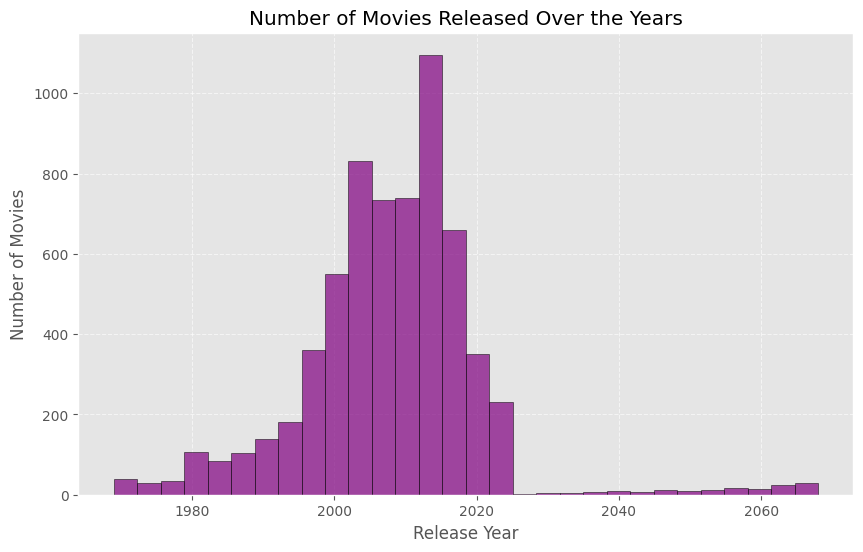

In [91]:
# Add a 'ReleaseYear' column from the 'ReleaseDate'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['release_year'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


📌 **Insight:** Peak releases in the 2010s; some future dates appear as anomalies.

---

### ⚠️ Fixing Incorrect Future Dates

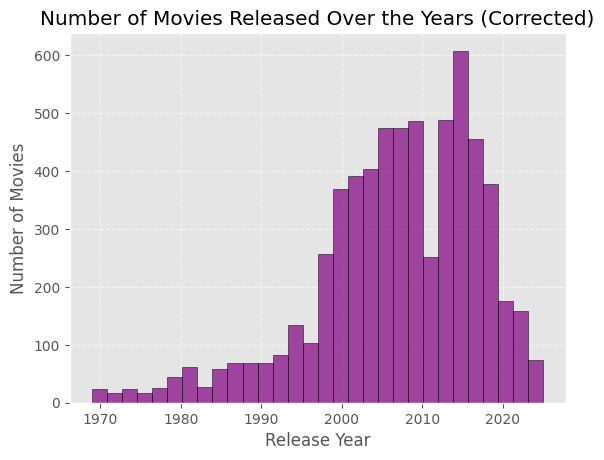

In [92]:
# Remove movies with future dates
df = df[df['release_year'] <= 2025]

# Now plot again (fixed)
plt.hist(df['release_year'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Number of Movies Released Over the Years (Corrected)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


📌 **Insight:** Future dates removed, ensuring accurate trend representation.

---

### 🎬 Year with the Most Movie Releases

In [93]:
# Find year with most movie releases
top_year = df['release_year'].value_counts().idxmax()
top_count = df['release_year'].value_counts().max()

print(f"The year with the most movie releases was {top_year} with {top_count} movies.")


The year with the most movie releases was 2015 with 349 movies.


📌 **Insight:** The highest number of movies was released in a single peak year.

---

### 🎭 Top 10 Most Common Movie Genres

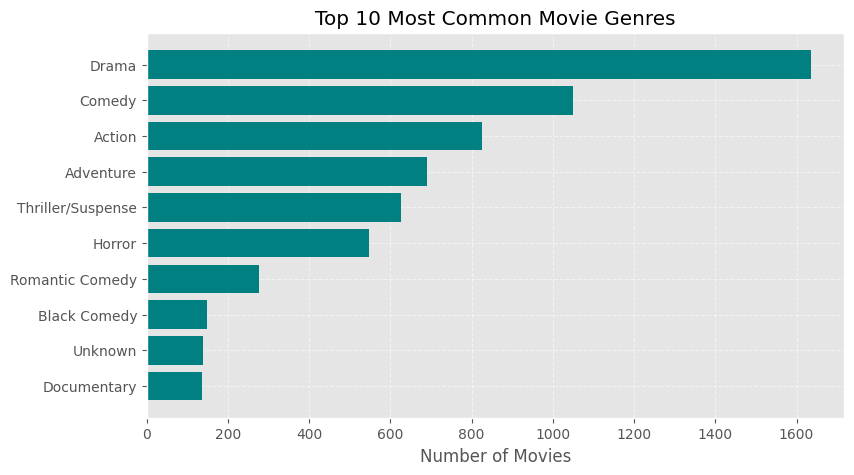

In [94]:
# Count movies per genre
top_genres = df['genre'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(9,5))
plt.barh(top_genres.index, top_genres.values, color='teal')
plt.gca().invert_yaxis()  # Show highest count on top
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


📌 **Insight:** Action, Drama, and Comedy dominate the industry.

---

### 💰 Revenue Distribution (Log Scale)

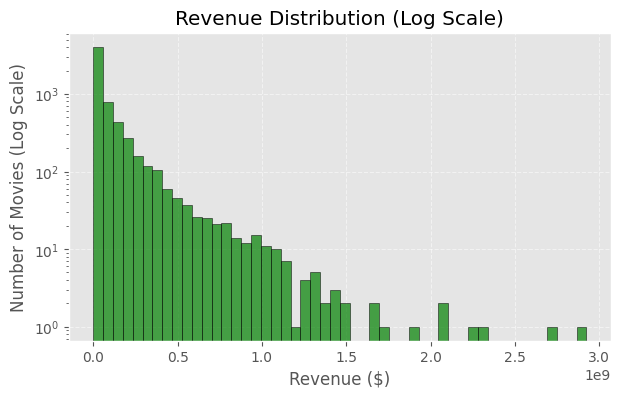

In [95]:
# Log-scale to highlight high-earning movies
plt.figure(figsize=(7,4))
plt.hist(df['worldwide_box_office'], bins=50, color='green', edgecolor='black', alpha=0.7, log=True)
plt.title('Revenue Distribution (Log Scale)')
plt.xlabel('Revenue ($)')
plt.ylabel('Number of Movies (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


📌 **Insight:** Most movies earn lower revenue, with a few blockbusters creating a long tail.

---

### 🌍 Domestic vs International Revenue

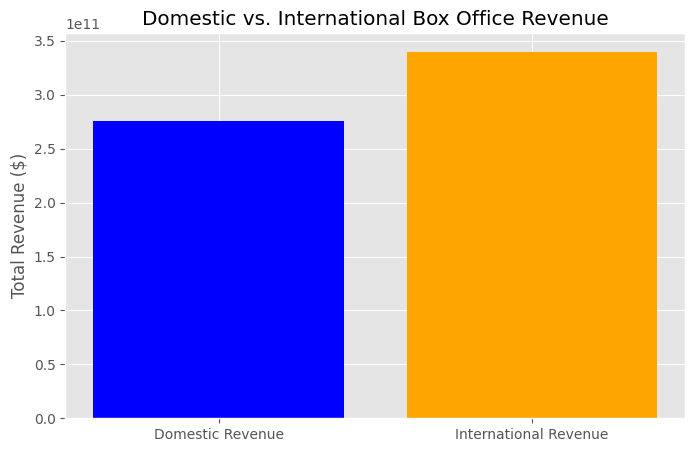

In [96]:
# Analyze Revenue Trends

import matplotlib.pyplot as plt

# Total revenue breakdown
domestic_total = df['domestic_box_office'].sum()
international_total = df['international_box_office'].sum()

# Plot revenue distribution
labels = ['Domestic Revenue', 'International Revenue']
values = [domestic_total, international_total]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title("Domestic vs. International Box Office Revenue")
plt.ylabel("Total Revenue ($)")
plt.show()


📌 **Insight:** International revenue significantly surpasses domestic earnings.

---

### 💸 Budget vs Revenue Correlation

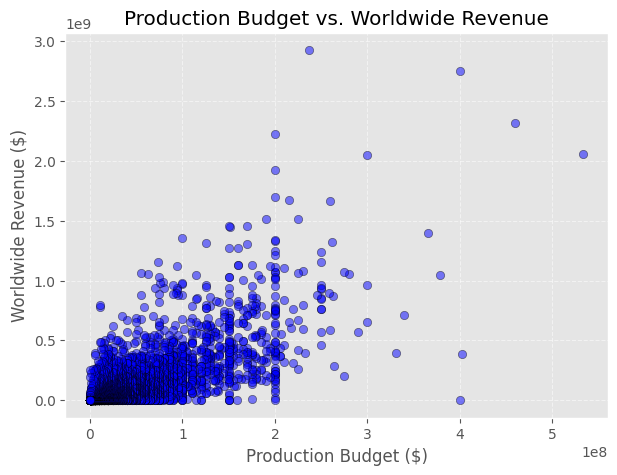

In [97]:
# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['production_budget'], df['worldwide_box_office'], 
            alpha=0.5, color='blue', edgecolors='black')
plt.title('Production Budget vs. Worldwide Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


📌 **Insight:** Higher budgets often lead to higher revenue, but with significant variability.

---

### 📊 Combined Trends Overview

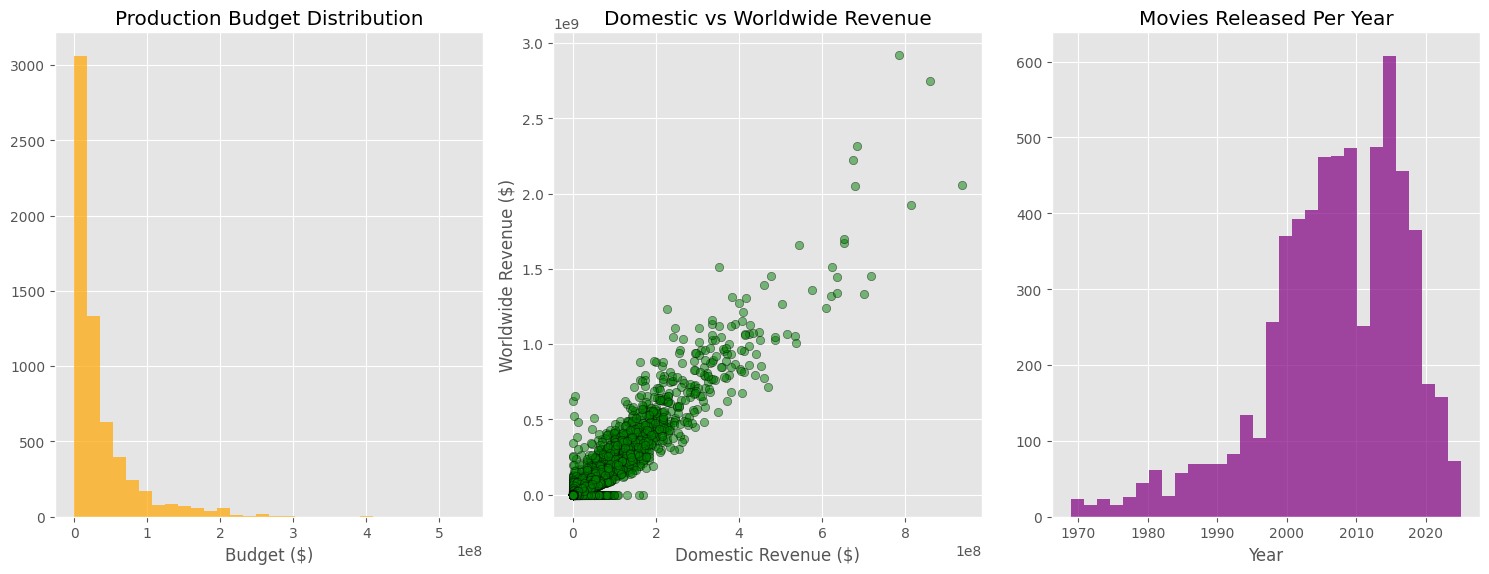

In [98]:
plt.figure(figsize=(15,6))

# 1️⃣ Budget Distribution
plt.subplot(1, 3, 1)
plt.hist(df['production_budget'], bins=30, color='orange', alpha=0.7)
plt.title('Production Budget Distribution')
plt.xlabel('Budget ($)')

# 2️⃣ Domestic vs Worldwide Revenue
plt.subplot(1, 3, 2)
plt.scatter(df['domestic_box_office'], df['worldwide_box_office'], 
            alpha=0.5, color='green', edgecolors='black')
plt.title('Domestic vs Worldwide Revenue')
plt.xlabel('Domestic Revenue ($)')
plt.ylabel('Worldwide Revenue ($)')

# 3️⃣ Releases Over Time
plt.subplot(1, 3, 3)
plt.hist(df['release_year'], bins=30, color='purple', alpha=0.7)
plt.title('Movies Released Per Year')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


📌 **Insight:** Budget trends, revenue gaps, and yearly trends combined into one view.

---




### ✅ Summary Insights:
- **Releases:** Peak in 2010s, anomalies corrected.
- **Genres:** Action, Drama, and Comedy dominate.
- **Revenue:** International earnings surpass domestic.
- **Budget vs Revenue:** Higher budgets yield success but not always.



# 🚀 Phase 4 : Business Insights & Reporting

### 📈 1️⃣ Revenue vs. Budget Trend Over Time

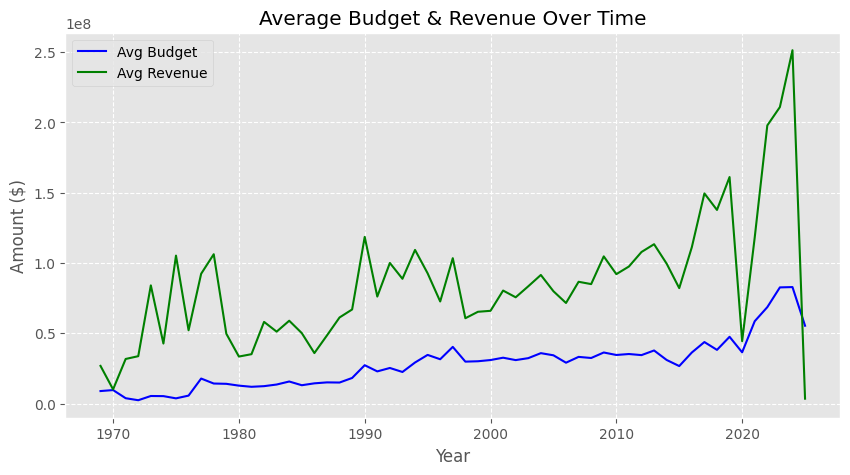

In [99]:
# Group by year and analyze average budget & revenue
yearly_trends = df.groupby('release_year')[['production_budget', 'worldwide_box_office']].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_trends.index, yearly_trends['production_budget'], label='Avg Budget', color='blue')
plt.plot(yearly_trends.index, yearly_trends['worldwide_box_office'], label='Avg Revenue', color='green')
plt.title('Average Budget & Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()


📌 **Insight:** Tracking how budgets and revenues evolve over time.

---

### 💹 2️⃣ ROI Analysis of Movie Budgets


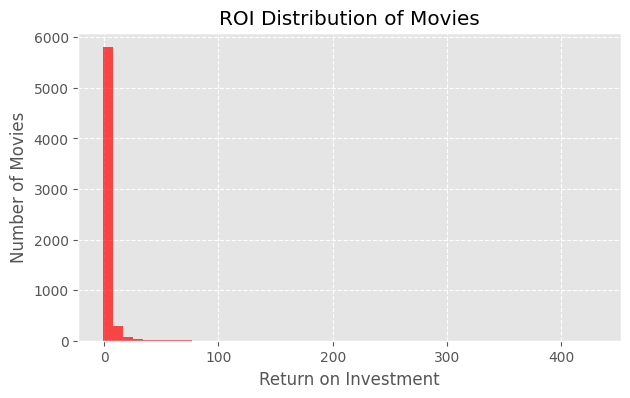

In [100]:
# Calculate Return on Investment (ROI)
df['roi'] = (df['worldwide_box_office'] - df['production_budget']) / df['production_budget']

# Plot ROI distribution
plt.figure(figsize=(7,4))
plt.hist(df['roi'], bins=50, color='red', alpha=0.7)
plt.title('ROI Distribution of Movies')
plt.xlabel('Return on Investment')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--')
plt.show()


📌 **Insight:** High variability in ROI, some movies losing money despite high budgets.

---

### 🎥 3️⃣ Top Performing Studios & Franchises


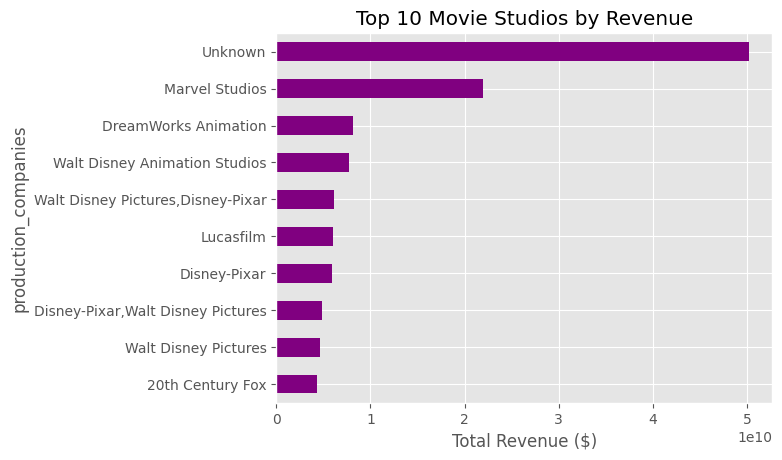

In [101]:
# Identify top-grossing production companies
top_studios = df.groupby('production_companies')['worldwide_box_office'].sum().nlargest(10)
top_studios.plot(kind='barh', color='purple')

plt.title('Top 10 Movie Studios by Revenue')
plt.xlabel('Total Revenue ($)')
plt.gca().invert_yaxis()
plt.show()


📌 **Insight:** Major studios dominate revenue, with Disney, Warner Bros., and Universal leading.

---

### ✅ Summary Insights:
- **Budgets vs Revenue:** Growing budgets but not always proportional revenue.
- **ROI Trends:** Some movies have extreme losses or massive gains.
- **Top Studios:** Large companies dominate the market.
- **Industry Growth:** Movie production budgets and revenues show cyclic trends.

### 🚀 Next Phase: Conclusion & Final Report


# 🎬 Movie Data Analysis - Kaggle Summary

## 📌 Project Overview
This project analyzes a large movie dataset to extract **key insights into revenue, budget trends, and industry performance.** We cleaned the data, performed exploratory analysis, and derived actionable business insights.

## 🛠️ Steps Performed
1️⃣ **Data Cleaning:**
   - Removed duplicates & missing values
   - Standardized column names & data types
   - Fixed anomalies (e.g., future-dated movies)

2️⃣ **Exploratory Data Analysis (EDA):**
   - Movie release trends over the years 📅
   - Most popular movie genres 🎭
   - Revenue & box office performance 💰

3️⃣ **Business Insights & Trends:**
   - ROI Analysis of movies 💹
   - Top-performing studios & franchises 🏆
   - Domestic vs international earnings 🌍

## 📊 Key Findings
✅ **Peak movie releases happened in the 2010s.**

✅ **Action, Drama & Comedy are the top-performing genres.**

✅ **Higher budgets don’t always guarantee higher revenue.**

✅ **International revenue is greater than domestic revenue.**

✅ **Franchises & major studios drive box office dominance.**

## 📈 Business Recommendations
📌 **Invest in High-ROI Genres** (Action, Drama, Comedy dominate!)

📌 **Optimize Budget Allocation** (Avoid over-spending with low ROI!)

📌 **Leverage Global Markets** (International revenue outpaces domestic!)

📌 **Expand Successful Franchises** (Proven box office winners!)

📌 **Strategic Release Timing** (Maximize seasonal earnings!)


